# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
!pip install citipy

In [2]:
#Specify necessary dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#Get unique weather api key from the api_keys python file
from api_keys import weather_api_key

# Import citipy after pip install to find out the cities longitude and latitude coordinatesx
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for lat and lon data
lat_lngs = []

# Empty list for all the cities
cities = []

# Range of values for longitude and latitude
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create random longitude and latitude
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#For every latitude and longitude in the list
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #for each city, add it to the cities list
    if city not in cities:
        cities.append(city)

#print the total number of cities
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


In [4]:
cities

['hasaki',
 'tiksi',
 'silver city',
 'san ignacio',
 'invercargill',
 'yellowknife',
 'vorgashor',
 'georgetown',
 'ilorin',
 'port-aux-francais',
 'edinburgh of the seven seas',
 'caleta de carquin',
 'waitangi',
 'ciudad lazaro cardenas',
 'enewetak',
 'micheweni',
 'oranjemund',
 'zhezqazghan',
 'longyearbyen',
 'isafjordur',
 'margaret river',
 'devinuwara',
 'tamanrasset',
 'madison',
 'talnakh',
 'villa gesell',
 'la passe',
 'west island',
 'cabedelo',
 'port alfred',
 'hermanus',
 'novoishimskiy',
 'lionel town',
 'olonkinbyen',
 'albany',
 'hithadhoo',
 'sabinanigo',
 'ribeira grande',
 'isangel',
 'sandnessjoen',
 'puerto gaitan',
 'poronaysk',
 'grytviken',
 'okha',
 'holualoa',
 'astrakhan',
 'hawaiian paradise park',
 'fort st. john',
 'port douglas',
 'calca',
 'ushuaia',
 'bredasdorp',
 'vingt cinq',
 'cabo san lucas',
 'ormara',
 'punta arenas',
 'bethel',
 'alofi',
 'chui',
 'puerto ayora',
 'bilibino',
 'namibe',
 'whitehorse',
 'papatowai',
 'puerto natales',
 'bunc

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print(url + "&q=san francisco")

http://api.openweathermap.org/data/2.5/weather?units=metric&appid=a4b719b11af797ca58c5942b718aabdc&q=san francisco


In [6]:
#Define base url with unique weather api key
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

#Create an empty list to get the weather data for each city
city_data = []

#Print to tell the user that data is being gathered
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters for record and set
record_count = 1
set_count = 1

#Loop through all the cities in city_data to get weather data
for i, city in enumerate(cities):
        
    #Group cities in groups of 50 each
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    #Create endpoint URL for each city
    city_url = f"{url}&q={city}"
    
    #Keep track the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    #Increment the record count by 1
    record_count += 1

    #Run an API request/call for each of the cities
    try:
        #Get the request and convert to json to get the raw data
        city_weather = requests.get(city_url).json()

        #Take the latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        #Append the previous values into the city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
#Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hasaki
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | silver city
Processing Record 4 of Set 1 | san ignacio
Processing Record 5 of Set 1 | invercargill
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | vorgashor
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | ilorin
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | caleta de carquin
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | ciudad lazaro cardenas
Processing Record 15 of Set 1 | enewetak
Processing Record 16 of Set 1 | micheweni
Processing Record 17 of Set 1 | oranjemund
Processing Record 18 of Set 1 | zhezqazghan
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | isafjordur
Processing Record 21 of Set 1 | margaret river
Processing

City not found. Skipping...
Processing Record 38 of Set 4 | arkalyk
Processing Record 39 of Set 4 | guatire
Processing Record 40 of Set 4 | warmbad
Processing Record 41 of Set 4 | ola
Processing Record 42 of Set 4 | kununurra
Processing Record 43 of Set 4 | copiapo
Processing Record 44 of Set 4 | vylkove
Processing Record 45 of Set 4 | ust-nera
Processing Record 46 of Set 4 | tura
Processing Record 47 of Set 4 | thal
Processing Record 48 of Set 4 | kone
Processing Record 49 of Set 4 | nukunonu
City not found. Skipping...
Processing Record 0 of Set 5 | fortuna
Processing Record 1 of Set 5 | tasbuget
City not found. Skipping...
Processing Record 2 of Set 5 | enoch
Processing Record 3 of Set 5 | cable beach
City not found. Skipping...
Processing Record 4 of Set 5 | gorontalo
Processing Record 5 of Set 5 | kodiak
Processing Record 6 of Set 5 | mugia
Processing Record 7 of Set 5 | nigel
Processing Record 8 of Set 5 | schweich
Processing Record 9 of Set 5 | ancud
Processing Record 10 of Set 

Processing Record 28 of Set 8 | colares
Processing Record 29 of Set 8 | taguatinga
Processing Record 30 of Set 8 | mar del plata
Processing Record 31 of Set 8 | corowa
Processing Record 32 of Set 8 | sevsk
Processing Record 33 of Set 8 | arkhangel'sk
Processing Record 34 of Set 8 | salekhard
Processing Record 35 of Set 8 | alice springs
Processing Record 36 of Set 8 | sampit
Processing Record 37 of Set 8 | ahau
City not found. Skipping...
Processing Record 38 of Set 8 | gargalianoi
Processing Record 39 of Set 8 | el granada
Processing Record 40 of Set 8 | kongolo
Processing Record 41 of Set 8 | cabinda
Processing Record 42 of Set 8 | nantucket
Processing Record 43 of Set 8 | ofunato
Processing Record 44 of Set 8 | susuman
Processing Record 45 of Set 8 | luderitz
Processing Record 46 of Set 8 | lobujya
Processing Record 47 of Set 8 | dudinka
Processing Record 48 of Set 8 | tsiombe
Processing Record 49 of Set 8 | glace bay
Processing Record 0 of Set 9 | klyuchi
Processing Record 1 of Set

Processing Record 18 of Set 12 | minas de matahambre
City not found. Skipping...
Processing Record 19 of Set 12 | hluti
Processing Record 20 of Set 12 | wittenburg
Processing Record 21 of Set 12 | witu
Processing Record 22 of Set 12 | wiwili
Processing Record 23 of Set 12 | chita
Processing Record 24 of Set 12 | 'ain el hadjel
City not found. Skipping...
Processing Record 25 of Set 12 | tazacorte
Processing Record 26 of Set 12 | recani
Processing Record 27 of Set 12 | papao
Processing Record 28 of Set 12 | la libertad
Processing Record 29 of Set 12 | kirakira
Processing Record 30 of Set 12 | saint-francois
Processing Record 31 of Set 12 | turpan
Processing Record 32 of Set 12 | lashio
Processing Record 33 of Set 12 | debre tabor
Processing Record 34 of Set 12 | pagar alam
Processing Record 35 of Set 12 | griffith
Processing Record 36 of Set 12 | leskovac
Processing Record 37 of Set 12 | al jawf
Processing Record 38 of Set 12 | levuka
Processing Record 39 of Set 12 | taltal
Processing R

In [7]:
#Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

#Show the count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [8]:
#Show the dataframe for the first five rows
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hasaki,35.7333,140.8333,31.22,78,100,3.61,JP,1694846487
1,tiksi,71.6872,128.8694,2.32,67,100,7.57,RU,1694846487
2,silver city,32.7701,-108.2803,19.27,53,0,3.60,US,1694846488
3,san ignacio,17.1561,-89.0714,25.08,94,0,0.00,BZ,1694846488
4,invercargill,-46.4000,168.3500,12.79,78,88,4.02,NZ,1694846488


In [10]:
#Export the city data dataframe to a csv file named cities.csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hasaki,35.7333,140.8333,31.22,78,100,3.61,JP,1694846487
1,tiksi,71.6872,128.8694,2.32,67,100,7.57,RU,1694846487
2,silver city,32.7701,-108.2803,19.27,53,0,3.60,US,1694846488
3,san ignacio,17.1561,-89.0714,25.08,94,0,0.00,BZ,1694846488
4,invercargill,-46.4000,168.3500,12.79,78,88,4.02,NZ,1694846488


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

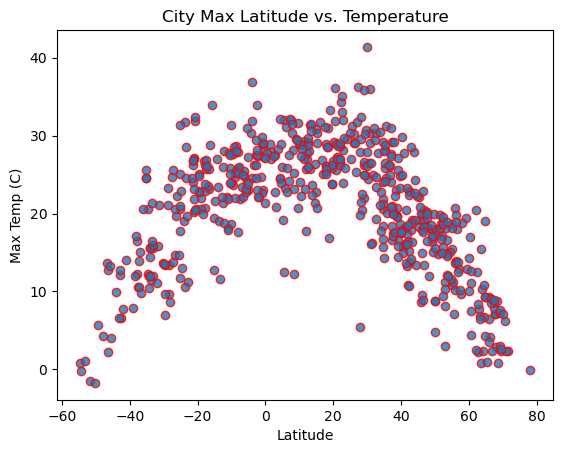

In [13]:
#Create a scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="red",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities")

#Make a title, x label title, and y label title
plt.title(f"City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

#Save the plot to Fig1.png
plt.savefig("output_data/Fig1.png")

# Show the plot
plt.show()

#### Latitude Vs. Humidity

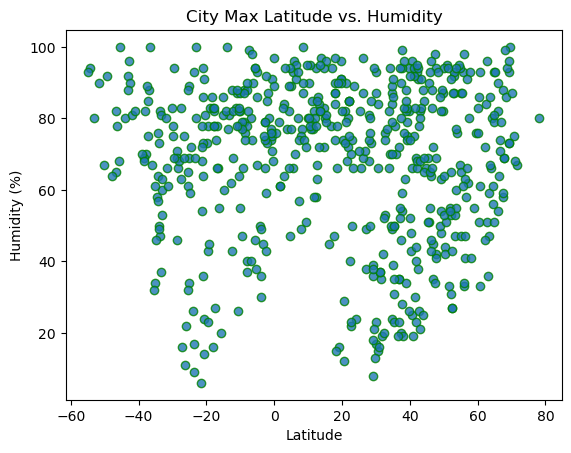

In [14]:
#Create a scatter plot for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="green",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities")

#Make a title, x label title, and y label title
plt.title(f"City Max Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Save the plot to Fig2.png
plt.savefig("output_data/Fig2.png")

# Show the plot
plt.show()

#### Latitude Vs. Cloudiness

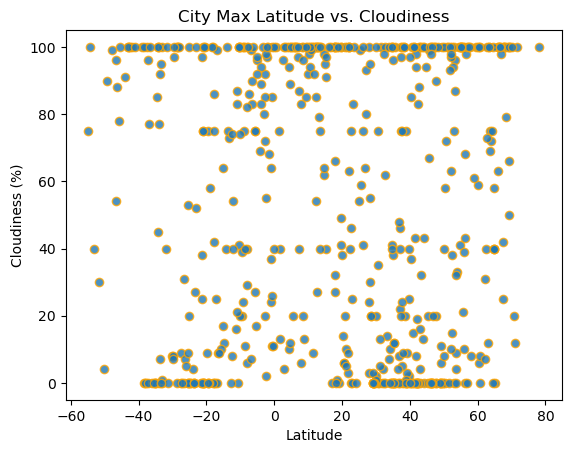

In [15]:
#Create a scatter plot for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="orange",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities")

#Make a title, x label title, and y label title
plt.title(f"City Max Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the plot to Fig3.png
plt.savefig("output_data/Fig3.png")

# Show the plot
plt.show()

#### Latitude vs. Wind Speed Plot

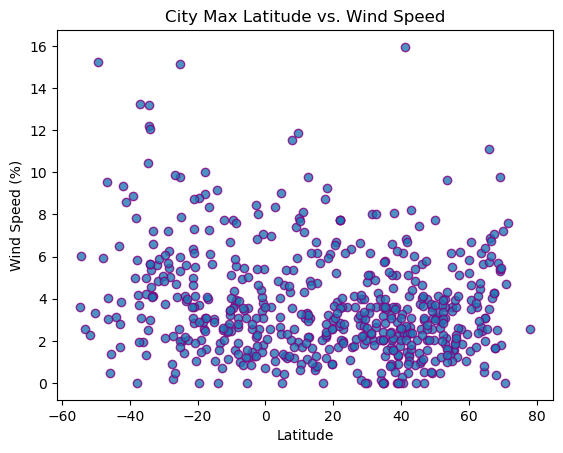

In [23]:
#Create a scatter plot for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="purple",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities")

#Make a title, x label title, and y label title
plt.title(f"City Max Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")

# Save the plot to Fig4.png
plt.savefig("output_data/Fig4.png")

# Show the plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
#Define a function to make the Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):
    
    (slope, intercept, rvalue, pvalue, stderr)= linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show()

In [24]:
#Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

#Display the data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hasaki,35.7333,140.8333,31.22,78,100,3.61,JP,1694846487
1,tiksi,71.6872,128.8694,2.32,67,100,7.57,RU,1694846487
2,silver city,32.7701,-108.2803,19.27,53,0,3.60,US,1694846488
3,san ignacio,17.1561,-89.0714,25.08,94,0,0.00,BZ,1694846488
5,yellowknife,62.4560,-114.3525,12.45,84,40,3.60,CA,1694846488


In [26]:
#Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

#Display the data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,invercargill,-46.4000,168.3500,12.79,78,88,4.02,NZ,1694846488
9,port-aux-francais,-49.3500,70.2167,5.64,92,90,15.24,TF,1694846489
10,edinburgh of the seven seas,-37.0676,-12.3116,15.00,88,77,13.25,SH,1694846489
11,caleta de carquin,-11.0925,-77.6267,18.17,87,87,2.66,PE,1694846490
12,waitangi,-43.9535,-176.5597,9.90,80,91,3.13,NZ,1694846490


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.6030660262055694


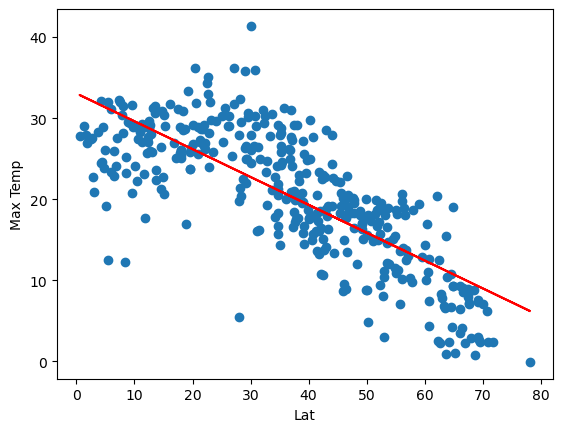

In [49]:
#Linear regression on Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-40, 30))

The r-value is 0.5992756631160266


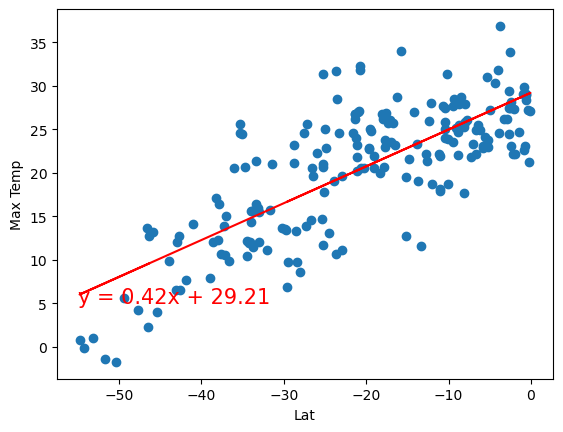

In [46]:
# Linear regression on Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The regression linear graphs show that as latitude increases for the Northern Hemisphere, the max temperature goes down. For the Southern Hemisphere, when latitude increases, the max temperature goes up.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.005537136932804853


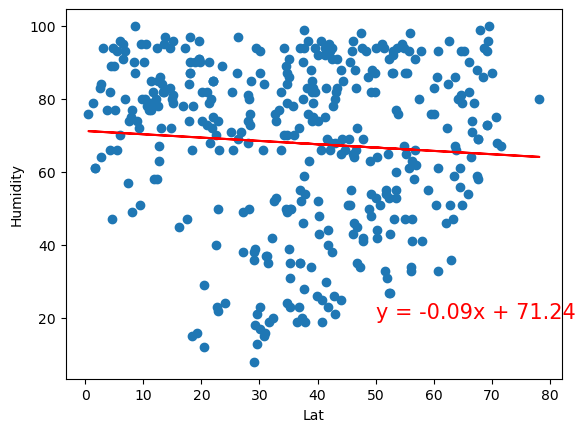

In [30]:
#Linear regression on Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (50, 20))

The r-value is 0.0001981394954537606


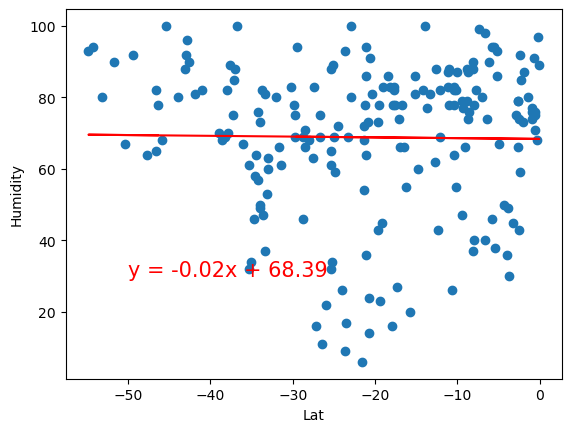

In [31]:
#Linear regression on Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The regression linear graphs show that the humidity remains relatively constant for any value of latitude for both the Northern and Southern Hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.004249736185678088


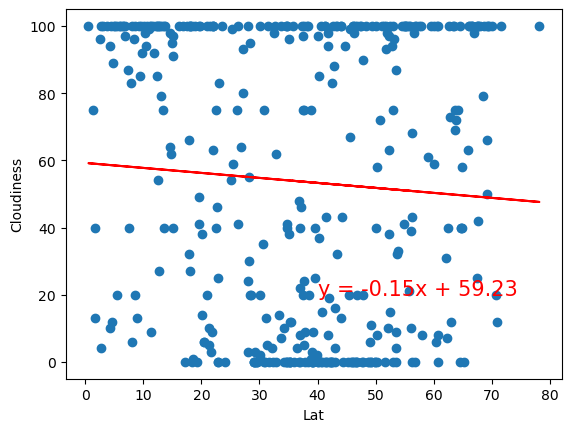

In [40]:
#Linear regression on Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40, 20))

The r-value is 0.0010390330889856714


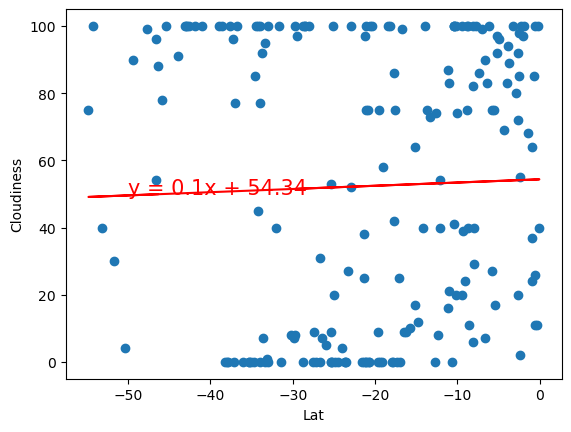

In [36]:
#Linear regression on Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-50, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The regression linear graphs show that cloudiness basically stays constant for the Southern Hemisphere. On the other hand, the Northern Hemisphere shows some decrease in cloudiness as latitude increases.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 2.5157683028989816e-05


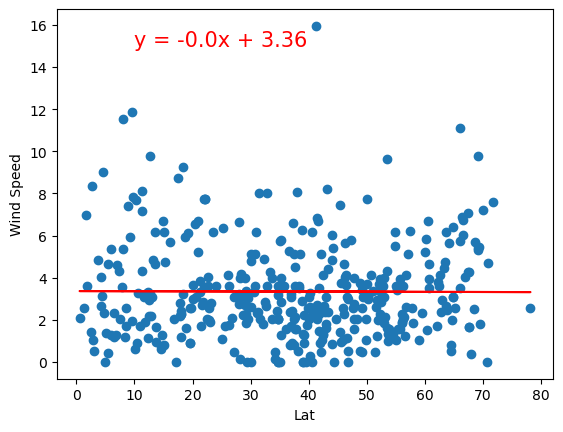

In [41]:
#Linear regression on Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10, 15))

The r-value is 0.06261504936691777


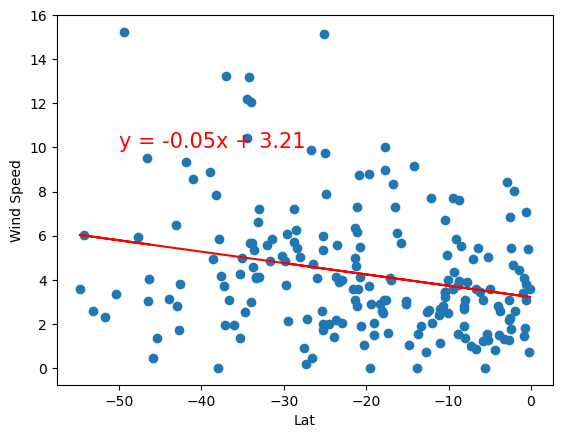

In [42]:
#Linear regression on Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values,  "Wind Speed", (-50, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The regression linear graphs show that wind speed drops when latitude goes up for the Southern Hemisphere. The wind speed remains constant for the most part in the Northern Hemisphere.